r_max 2828.42712474619


KeyboardInterrupt: 

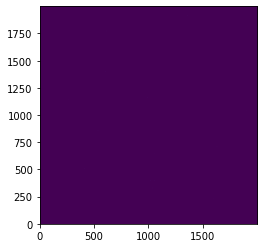

In [42]:
import numpy as np
import imageio.v2 as imageio
import math
import hough_transform as ht
import scipy.ndimage as ndimage
import scipy.sparse as sparse
import os
import matplotlib.pyplot as plt
import matplotlib.transforms as trans
import cv2

col = np.array([1595.45,1351.52,607.43,599.38,987.86,264.89,1897.73,531.53,1624.49,1046.86,409.3,1047.52,1011.22,1032.34,1595.45,1351.52,607.43,599.38,987.86,264.89,1897.73,531.53,1624.49,1046.86,409.3,1047.52,1011.22,1032.34])
row = np.array([237.1,1914.85,1770.4,1399.6,1162.9,1139.95,1044.4,857.95,710.35,643.9,511,400.6,396.85,329.65,237.1,1914.85,1770.4,1399.6,1162.9,1139.95,1044.4,857.95,710.35,643.9,511,400.6,396.85,329.65])
data = np.array([1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1])
image = sparse.coo_matrix((data, (row,col)),shape=(2000, 2000), dtype=float).toarray()

# image = np.zeros((50,50))
# image[10:40, 10:40] = np.eye(30)
plt.imshow(image, origin='lower')

img_shape = image.shape

x_max = img_shape[0]
y_max = img_shape[1]

theta_max = 1.0 * math.pi 
theta_min = 0.0

r_min = 0.0
r_max = math.hypot(x_max, y_max)
print('r_max',r_max)

r_dim = 100 
theta_dim = 300

hough_space = np.zeros((r_dim,theta_dim))

for x in range(x_max):
    for y in range(y_max):
        if image[x,y] == 255: continue
        for itheta in range(theta_dim):
            theta = 1.0 * itheta * theta_max / theta_dim
            r = x * math.cos(theta) + y * math.sin(theta)
            ir = np.ceil(r_dim * ( 1.0 * r ) / r_max).astype(int)
            # print('ir',ir)
            # print('itheta',itheta)
            hough_space[ir,itheta] = hough_space[ir,itheta] + 1

# plt.imshow(hough_space, origin='lower')
plt.xlim(0,theta_dim)
plt.ylim(0,r_dim)

tick_locs = [i for i in range(0,theta_dim,40)]
tick_lbls = [round( (1.0 * i * theta_max) / theta_dim,1) for i in range(0,theta_dim,40)]
plt.xticks(tick_locs, tick_lbls)

tick_locs = [i for i in range(0,r_dim,20)]
tick_lbls = [round( (1.0 * i * r_max ) / r_dim,1) for i in range(0,r_dim,20)]
plt.yticks(tick_locs, tick_lbls)

plt.xlabel(r'Theta')
plt.ylabel(r'r')
plt.title('Hough Space')

plt.imshow(hough_space)

neighborhood_size = hough_space.size/10
print('neighborhood_size',neighborhood_size)
# for neighborhood_size in range(10,300):
    # print('neighborhood_size',neighborhood_size)
# neighborhood_size = 200   fairly good
threshold = 5             #fairly good, no effect changing from 1 through 10

data_max = ndimage.maximum_filter(hough_space, neighborhood_size)
maxima = (hough_space == data_max)

data_min = ndimage.minimum_filter(hough_space, neighborhood_size)
diff = ((data_max - data_min) > threshold)
maxima[diff == 0] = 0

labeled, num_objects = ndimage.label(maxima)
slices = ndimage.find_objects(labeled)

x, y = [], []
for dy,dx in slices:
    x_center = (dx.start + dx.stop - 1)/2
    x.append(x_center)
    y_center = (dy.start + dy.stop - 1)/2    
    y.append(y_center)

# print('x',x)
# print('y',y)

# plt.imshow(hough_space, origin='lower')
# plt.savefig('hough_space_i_j.png', bbox_inches = 'tight')

plt.autoscale(False)
plt.plot(x,y, 'ro')
plt.figure()
# print('len(x)',len(x))
# print('len(y)',len(y))
# plt.savefig('hough_space_maximas.png', bbox_inches = 'tight')
#plt.savefig("hough_space_r_theta.png",bbox_inches='tight')

#plt.close()

line_index = 1

# print('x[0]',x[0])
# print('y[0]',y[0])
i = y[0]
j = x[0]

# print i,j

print('r_max',r_max)
print('r_dim',r_dim)

r = round( (1.0 * i * r_max ) / r_dim,1)
theta = round( (1.0 * j * theta_max) / theta_dim,1)

print('r', r)
print('theta', np.rad2deg(theta))

fig, ax = plt.subplots()

ax.imshow(image, origin='lower')

ax.autoscale(False)

print('Y_MAX',y_max)

px = []
py = []
for i in range(0, np.int64(r_max), 1):
   px.append(math.cos(theta) * i)
   py.append(math.sin(theta) * i)

# print('px',px)
# print('py',py)

ax.plot(px, py, 'b+', linewidth=1)
plt.show()

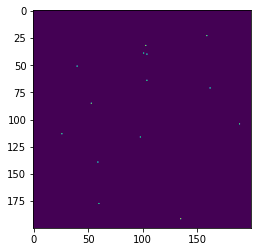

In [44]:
import numpy as np
import imageio.v2 as imageio
import math
import hough_transform as ht
import scipy.ndimage as ndimage
import scipy.sparse as sparse
import os
import matplotlib.pyplot as plt
import matplotlib.transforms as trans
import cv2

col = np.array([159.545,135.152,60.743,59.938,98.786,26.489,189.773,53.153,162.449,104.686,40.93,104.752,101.122,103.234,159.545,135.152,60.743,59.938,98.786,26.489,189.773,53.153,162.449,104.686,40.93,104.752,101.122,103.234])
row = np.array([23.71,191.485,177.04,139.96,116.29,113.995,104.44,85.795,71.035,64.39,51.1,40.06,39.685,32.965,23.71,191.485,177.04,139.96,116.29,113.995,104.44,85.795,71.035,64.39,51.1,40.06,39.685,32.965])
data = np.array([1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1])
mat = sparse.coo_matrix((data, (row,col)),shape=(200, 200), dtype=float).toarray()
plt.imshow(mat) #, origin='lower'

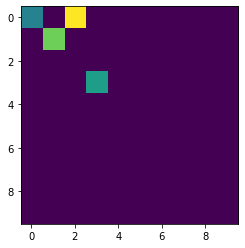

In [35]:
row  = np.array([0, 3, 1, 0])
col  = np.array([0, 3, 1, 2])
data = np.array([4, 5, 7, 9])
mat = sparse.coo_matrix((data, (row, col)), shape=(10, 10)).toarray()
plt.imshow(mat) #, origin='lower'